This notebook is to create a dataset to be used to train a model for predicting images.  The dataset is a csv containing quotes that are read in then transformed and output to train.

Each image is assigned to an image.

In [177]:
import csv
import string
import pandas as pd

The csv is read into a dataframe

In [178]:
df = pd.read_csv('imagequotes.csv')

In [179]:
df.head()

,Image,Quote
0,1,As human beings our greatness lies not so muc...
1,1,We prefer world law in the age of self-determ...
2,1,Better pass boldly into that other world in t...
3,1,The credit of advancing science has always be...
4,1,It is well for the world that in most of us b...


In [180]:
import tensorflow as tf
import tensorflow_hub as hub

module_url = 'https://tfhub.dev/google/universal-sentence-encoder/4'
model = hub.load(module_url)

In [181]:
df['Vector'] = model(df['Quote'])

In [182]:
dataset = pd.DataFrame(df['Vector'].tolist(), index=df.index)

In [183]:
dataset['Image'] = df['Image']

In [184]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,Image
0,"tf.Tensor(-0.03283241, shape=(), dtype=float32)","tf.Tensor(-0.09350429, shape=(), dtype=float32)","tf.Tensor(-0.032954615, shape=(), dtype=float32)","tf.Tensor(-0.03530036, shape=(), dtype=float32)","tf.Tensor(-0.07421113, shape=(), dtype=float32)","tf.Tensor(0.03126013, shape=(), dtype=float32)","tf.Tensor(-0.020682173, shape=(), dtype=float32)","tf.Tensor(0.026027601, shape=(), dtype=float32)","tf.Tensor(0.06678587, shape=(), dtype=float32)","tf.Tensor(0.031110557, shape=(), dtype=float32)",...,"tf.Tensor(0.031632885, shape=(), dtype=float32)","tf.Tensor(-0.056682445, shape=(), dtype=float32)","tf.Tensor(0.008430766, shape=(), dtype=float32)","tf.Tensor(0.03814993, shape=(), dtype=float32)","tf.Tensor(0.0075748824, shape=(), dtype=float32)","tf.Tensor(0.0034700483, shape=(), dtype=float32)","tf.Tensor(-0.064628266, shape=(), dtype=float32)","tf.Tensor(0.03254001, shape=(), dtype=float32)","tf.Tensor(0.03742683, shape=(), dtype=float32)",1
1,"tf.Tensor(0.020856572, shape=(), dtype=float32)","tf.Tensor(-0.03621651, shape=(), dtype=float32)","tf.Tensor(0.03957077, shape=(), dtype=float32)","tf.Tensor(0.032007534, shape=(), dtype=float32)","tf.Tensor(-0.097298265, shape=(), dtype=float32)","tf.Tensor(-0.03527937, shape=(), dtype=float32)","tf.Tensor(-0.014626204, shape=(), dtype=float32)","tf.Tensor(0.009335089, shape=(), dtype=float32)","tf.Tensor(0.053205486, shape=(), dtype=float32)","tf.Tensor(-0.0046333713, shape=(), dtype=float32)",...,"tf.Tensor(0.068360135, shape=(), dtype=float32)","tf.Tensor(0.0011862688, shape=(), dtype=float32)","tf.Tensor(-0.0042501586, shape=(), dtype=float32)","tf.Tensor(-0.015344017, shape=(), dtype=float32)","tf.Tensor(-0.009208948, shape=(), dtype=float32)","tf.Tensor(0.00012173634, shape=(), dtype=float32)","tf.Tensor(0.011467478, shape=(), dtype=float32)","tf.Tensor(-0.023475826, shape=(), dtype=float32)","tf.Tensor(-0.053603977, shape=(), dtype=float32)",1
2,"tf.Tensor(0.025333056, shape=(), dtype=float32)","tf.Tensor(-0.041800763, shape=(), dtype=float32)","tf.Tensor(-0.04352693, shape=(), dtype=float32)","tf.Tensor(0.0038669591, shape=(), dtype=float32)","tf.Tensor(-0.07491173, shape=(), dtype=float32)","tf.Tensor(0.003155171, shape=(), dtype=float32)","tf.Tensor(-0.009460537, shape=(), dtype=float32)","tf.Tensor(0.00501278, shape=(), dtype=float32)","tf.Tensor(0.021491798, shape=(), dtype=float32)","tf.Tensor(0.05836331, shape=(), dtype=float32)",...,"tf.Tensor(-0.0076297834, shape=(), dtype=float32)","tf.Tensor(-0.015316657, shape=(), dtype=float32)","tf.Tensor(-0.012000134, shape=(), dtype=float32)","tf.Tensor(-0.04042723, shape=(), dtype=float32)","tf.Tensor(0.017987527, shape=(), dtype=float32)","tf.Tensor(0.011247047, shape=(), dtype=float32)","tf.Tensor(0.021211384, shape=(), dtype=float32)","tf.Tensor(-0.038304195, shape=(), dtype=float32)","tf.Tensor(0.030053513, shape=(), dtype=float32)",1
3,"tf.Tensor(0.028222848, shape=(), dtype=float32)","tf.Tensor(-0.06331853, shape=(), dtype=float32)","tf.Tensor(0.02779416, shape=(), dtype=float32)","tf.Tensor(-0.016855037, shape=(), dtype=float32)","tf.Tensor(-0.094050065, shape=(), dtype=float32)","tf.Tensor(0.017606316, shape=(), dtype=float32)","tf.Tensor(0.04621162, shape=(), dtype=float32)","tf.Tensor(0.05642932, shape=(), dtype=float32)","tf.Tensor(0.027416842, shape=(), dtype=float32)","tf.Tensor(0.019753339, shape=(), dtype=float32)",...,"tf.Tensor(0.06284544, shape=(), dtype=float32)","tf.Tensor(-0.0078172665, shape=(), dtype=float32)","tf.Tensor(-0.03178239, shape=(), dtype=float32)","tf.Tensor(-0.01780948, shape=(), dtype=float32)","tf.Tensor(-0.06320212, shape=(), dtype=float32)","tf.Tensor(-0.015947752, shape=(), dtype=float32)","tf.Tensor(-0.026340852, shape=(), dtype=float32)","tf.Tensor(0.009958421, shape=(), dtype=float32)","tf.Tensor(0.056969814, shape=(), dtype=float32)",1
4,"tf.Tensor(-0.052367665, shape=(), dtype=float32)","tf.Tensor(-0.009509999, sh

In [185]:
from sklearn.model_selection import train_test_split

X = dataset.drop(['Image'], axis=1)
y = dataset['Image']

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [187]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6067415730337079

In [188]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [189]:
y_pred_test = clf.predict(X_test)

In [190]:
accuracy_score(y_test, y_pred_test)

0.6067415730337079

In [191]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

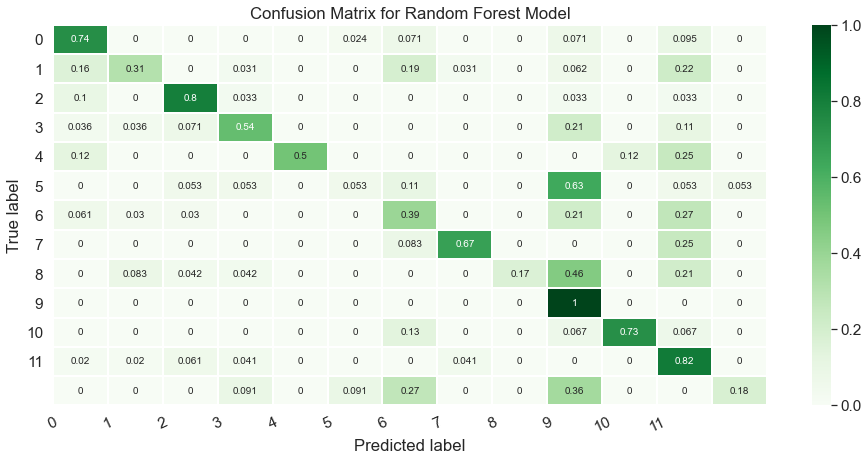

In [192]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = range(12)
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [193]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.70      0.74      0.72        42
           2       0.67      0.31      0.43        32
           3       0.75      0.80      0.77        30
           5       0.68      0.54      0.60        28
           6       1.00      0.50      0.67         8
           7       0.33      0.05      0.09        19
          12       0.43      0.39      0.41        33
          13       0.73      0.67      0.70        12
          15       1.00      0.17      0.29        24
          16       0.53      1.00      0.69        53
          17       0.92      0.73      0.81        15
          19       0.53      0.82      0.64        49
          21       0.67      0.18      0.29        11

    accuracy                           0.61       356
   macro avg       0.69      0.53      0.55       356
weighted avg       0.64      0.61      0.57       356



In [203]:
X_train.shape

(830, 512)

In [205]:
y_train.shape

(830,)

In [206]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [207]:
knn_predictions = knn_classifier.predict(X_test)

In [211]:
knn_classifier.score(X_test, y_test)

0.6095505617977528

In [209]:
y_test

997     19
802     16
216      2
1176    21
237      3
        ..
227      2
165      2
730     15
685     15
1158    21
Name: Image, Length: 356, dtype: int64

In [212]:
y_pred_test = knn_classifier.predict(X_test)

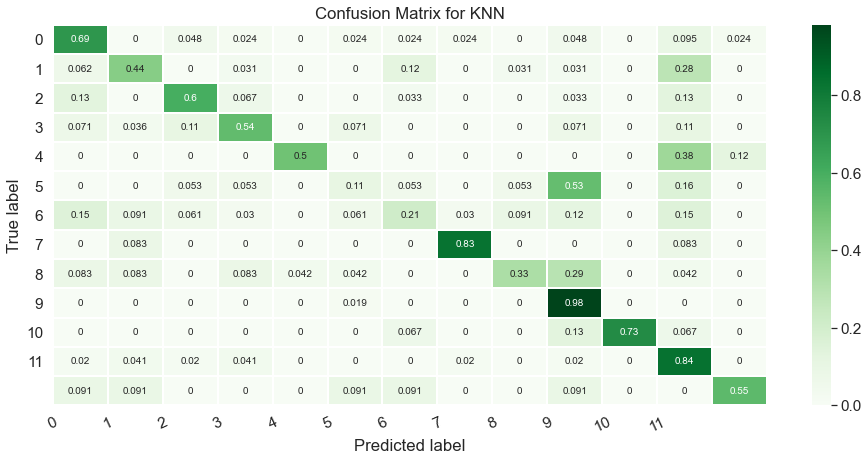

In [214]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = range(12)
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNN')
plt.show()